## Image Classification of an American Sign Language Dataset

The American Sign Language alphabet contains 26 letters - since two of those letters (j and z) require movement, I will omit them from the training dataset.

In [44]:
import opendatasets as od

In [45]:
dataset = 'https://www.kaggle.com/datasets/datamunge/sign-language-mnist/data'

In [46]:
od.download(dataset)

Skipping, found downloaded files in "./sign-language-mnist" (use force=True to force download)


In [47]:
import os

In [48]:
data_dir = './sign-language-mnist'

In [49]:
os.listdir(data_dir)

['american_sign_language.PNG',
 'sign_mnist_test.csv',
 'sign_mnist_train',
 'sign_mnist_train.csv',
 'sign_mnist_test',
 'amer_sign3.png',
 'amer_sign2.png']

In [50]:
import pandas as pd

In [51]:
sign_mnist_train = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')

In [52]:
sign_mnist_valid = pd.read_csv('sign-language-mnist/sign_mnist_test.csv')

In [53]:
sign_mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Extract the Labels and Images

In [54]:
y_train = sign_mnist_train['label'] # labels
y_valid = sign_mnist_valid['label']
del sign_mnist_train['label'] # dont want to include the output data in the input data
del sign_mnist_valid['label']

In [55]:
x_train = sign_mnist_train.values # images
x_valid = sign_mnist_valid.values

In [56]:
x_train.shape # 27455 images in training, each with 784 pixels (28 x 28)

(27455, 784)

In [57]:
y_train.shape # 27455 labels in training

(27455,)

In [58]:
x_valid.shape # 7172 images in validation, each with 784 pixels

(7172, 784)

In [59]:
y_valid.shape # 7172 labels in validation

(7172,)

Note: There is an error in the dataset.

There should be 24 classes since 'j' and 'z' are excluded [see dataset info]. However, there are 25 classes in this dataset, ranging from 0 to 24. The value 9 does not exist as a label in the y data. As a result, the values in the y data skip 9 and the images that should have a label of 9 point to a label of 10. The reason for this error is not known, but it can be fixed. Simply iterate through y_train & y_valid to look for all values >= 10, and subtract 1 to account for the missing value in the label data.

After the fix, there should be 24 classes, ranging from 0 to 23.

In [60]:
print(y_train.shape)
print(y_train.min())
print(y_train.max())

for i in range(y_train.size):
    if y_train[i] >= 10:
        y_train[i] = y_train[i] - 1

for i in range(y_valid.size):
    if y_valid[i] >= 10:
        y_valid[i] = y_valid[i] - 1

print('after modification')
print(y_train.shape)
print(y_train.min())
print(y_train.max())

(27455,)
0
24
after modification
(27455,)
0
23


### Visualize the Data

Note: The current input data is in a 1D shape of 784 pixels. In order to visualize the data, we need to reshape the input data to a 2D shape of 28x28 pixels.

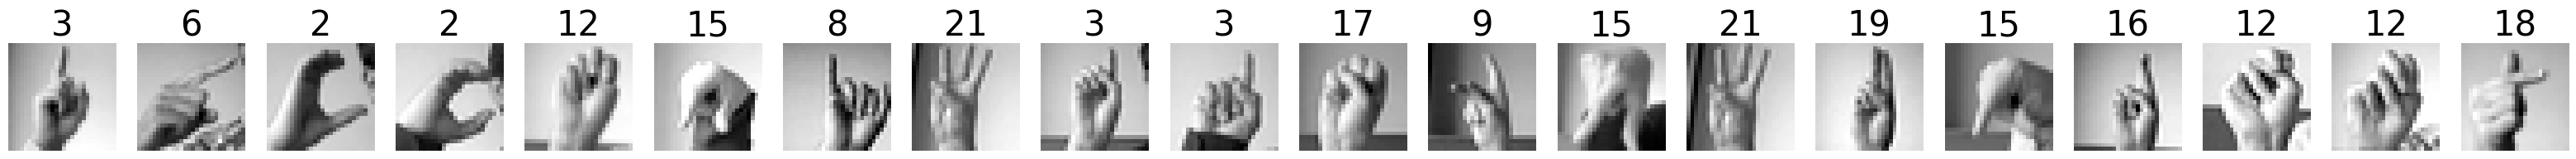

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28) # reshaping input data to 2D shape
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

### Normalize the Image Data

In [62]:
x_train.min()

0

In [63]:
x_train.max()

255

In [64]:
x_train = x_train / 255
x_valid = x_valid / 255

### Categorize the Labels

In [65]:
import tensorflow.keras as keras
num_classes = 24 # 26 letters in alphabet excluding j and z)

if not y_train.shape[-1] == 24: # avoid running multiple times
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [66]:
y_train[0] # y_train label after categorical encoding

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [67]:
### Build the Model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

/Users/sundar/Desktop/jupyter_practice/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,888 (2.58 MB)

 Trainable params: 676,888 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the Model

We use categorical crossentropy to reflect the fact that we want the images to fit into one of many categories.

In [70]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2496 - loss: 2.4991 - val_accuracy: 0.4752 - val_loss: 1.4894
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6240 - loss: 1.1125 - val_accuracy: 0.5620 - val_loss: 1.3360
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7847 - loss: 0.6333 - val_accuracy: 0.6493 - val_loss: 1.3723
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8550 - loss: 0.4360 - val_accuracy: 0.7083 - val_loss: 1.0401
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9093 - loss: 0.2970 - val_accuracy: 0.7945 - val_loss: 0.7878
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9276 - loss: 0.2401 - val_accuracy: 0.7836 - val_loss: 0.8623
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9466 - loss: 0.1897 - val_accuracy: 0.8189 - val_loss: 0.8088
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9558 - loss: 0.1787 - val_accuracy: 0.

As we observe, the model does well learning to categorize the training data, but performs poorly against the new validation data. Why? The model is memorizing the dataset, instead of gaining a robust and general understanding of the problem. This is an example of overfitting.

In [72]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

### Reshaping Images for a CNN

In [73]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

When the input data is in this 1D format, we miss out on a crucial piece of information: which pixels are near each other. It would be better to reshape the dataset so that they are in a 28x28 pixel format, which will allow our convolutions to associate groups of pixels and detect important features.

Note: For the first convolutional layer of the model, we need to have not only the height and width of the image, but also the number of color channels. Since this dataset is in grayscale, we will only have 1 channel.

This means that our current shape (27455, 784) will convert to (27455, 28, 28, 1). For our convenience, we can pass a -1 to the reshape method for any dimension we wish to be the same.

In [74]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)

In [75]:
x_train.shape

(27455, 28, 28, 1)

In [76]:
x_valid.shape

(7172, 28, 28, 1)

### Creating a Convolutional Model

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

/Users/sundar/Desktop/jupyter_practice/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Observe the structure of the CNN.

### Conv2D
Our 2D convolutional layers. Small kernels will go over the input image and detect features that are important for classification. Earlier convolutions will detect simpler features and later convolutions will detect more complex features. In the first Conv2D layer, 75 refers to the number of filters that will be learned. (3,3) refers to the size of those filters. Strides refer to the step size that the filter will take as it passes over the image. Padding refers to whether the output image that's created from the filter will match the size of the input image.

### BatchNormalization
Similar to normalizing inputs, batch normalization scales the values in the hidden layers to improve training.

### MaxPool2D
Max Pooling takes an image and essentially shrinks it to a lower resolution. This helps the model be more robust to translation (objects moving side to side), and also makes the model faster.

### Dropout
Dropout is a technique to prevent overfitting. It randomly selects a subset of neurons and turns them off, so that they do not participate in forward or backward propagation in that particular pass. This makes the network more robust and redundant, and ensures that it does not rely on any one area to come up with answers (can think of it as training all neurons fairly, instead of over-training a particular set of neurons, which will lead to overfitting).

### Flatten
Flatten takes the output of one layer, which is multidimensional, and flattens it into a one-dimensional array. The output is called a feature vector and will be connected to the final classification layer.

### Dense
The first dense layer (512 units) takes the flattened feature vector as input and learns which features will contribute to a particular classification. The second dense layer (num_classes=24 units) is the final classification layer that outputs the prediction.

In [78]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

In [79]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [80]:
model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7532 - loss: 0.8454 - val_accuracy: 0.7927 - val_loss: 0.6343
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9322 - val_loss: 0.2434
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9972 - loss: 0.0082 - val_accuracy: 0.9221 - val_loss: 0.3186
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9006 - val_loss: 0.3785
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9448 - val_loss: 0.2108
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9986 - loss: 0.0048 - val_accuracy: 0.9628 - val_loss: 0.1108
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9537 - val_loss: 0.2662
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9997 - loss: 9.5544e-0

### Analysis of Results

Although the model is significantly improved (training/validation accuracy is improved), the validation accuracy is jumping around. This is an indication that the model is not generalizing perfectly.

As observed, the validation accuracy still lags behind the training accuracy - a sign of overfitting. The model is getting confused by things it has not seen before when it tests against the validation dataset.

### Data Augmentation
In order to teach our model to be more robust when looking at new data, we're going to programmatically increase the size and variance in our dataset. This is called data augmentation. The increase in size gives the model more images to learn from while training. The increase in variance helps the model ignore unimportant features and select only the features that are truly important in classfication, allowing it to generalize better.

We use Keras class ImageDataGenerator for augmenting images.

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # don't randomlu flip images vertically
)

Why flip images horizontally, but not vertically? Our dataset contains pictures of hands signing the alphabet. If we want to use this model to classify hand images later, it's unlikely that those hands are going to be upside-down, but they might be left-handed. This kind of domain-specific reasoning can help make good decisions for your own deep learning applications.

### Batch Size

ImageDataGenerator will also batch our data so that the model can train on a random sample. Batching is a process that shuffles the whole dataset so that the probability of drawing any data entity is truly random. For each step of the training, a number of entities equal to the batch size will be used to train the model. Since the batch is a random sample, this will do a good job of representing all of our data even though it is a tiny fraction of the whole dataset.

In practice, a batch size of 32 or 64 entities does well.

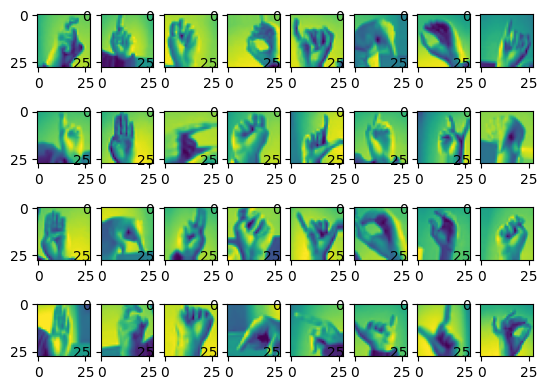

In [83]:
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

### Fit the Data to the Generator and Compile the Model

A data generator instance must be created and fit to the training data before compiling the model.

In [92]:
datagen.fit(x_train)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### Training with Augmentation

When training a model with an image generator, we pass the generator in using it's flow method, before the images are passed into the model for training. This augments the images live and in memory right before training.

Note: Generators can supply an indefinite amount of data (in our case: augmented images), so its necessary to state how long we want each epoch to run, or else the epoch will run indefinitely. This is set by the steps_per_epoch argument. Since steps * batch_size = number_of_images_trained in an epoch, we set the steps or steps_per_epoch equal to the non-augmented dataset size divided by the batch_size.

In [95]:
model.fit(img_iter,
          epochs=10,
          steps_per_epoch= len(x_train)//batch_size,  # run same number of steps we would if we were not using a generator
          validation_data=(x_valid, y_valid))

Epoch 1/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9640 - loss: 0.1173 - val_accuracy: 0.9608 - val_loss: 0.0937
Epoch 2/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9375 - loss: 0.2310

2024-05-04 23:31:08.966442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2310 - val_accuracy: 0.9858 - val_loss: 0.0375
Epoch 3/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9686 - loss: 0.0995 - val_accuracy: 0.9943 - val_loss: 0.0183
Epoch 4/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9688 - loss: 0.0759

2024-05-04 23:31:27.769968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0759 - val_accuracy: 0.9926 - val_loss: 0.0176
Epoch 5/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9732 - loss: 0.0859 - val_accuracy: 0.9364 - val_loss: 0.1757
Epoch 6/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9688 - loss: 0.0275

2024-05-04 23:31:46.873353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0275 - val_accuracy: 0.9407 - val_loss: 0.1560
Epoch 7/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9752 - loss: 0.0810 - val_accuracy: 0.9907 - val_loss: 0.0215
Epoch 8/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9375 - loss: 0.2310

2024-05-04 23:32:05.609027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2310 - val_accuracy: 0.9877 - val_loss: 0.0410
Epoch 9/10
857/857 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9803 - loss: 0.0677 - val_accuracy: 0.9799 - val_loss: 0.0662
Epoch 10/10
  1/857 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9688 - loss: 0.0662

2024-05-04 23:32:24.645040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


857/857 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0662 - val_accuracy: 0.9900 - val_loss: 0.0306


Note: The epoch starts over when there is not enough input data for the 1 epoch (the entire batch-sized training set should run in 1 epoch). All 10 epochs run, but some start over.

### Analysis of Results

The validation accuracy is higher and more consistent, which means that the model is no longer overfitting in the way that it was. It generalizes better, making better predictions on new data.

### Save the Model

To test the accuracy of the model, the model will be saved and used on an entirely new dataset of sign language pictures.

In [98]:
model.save('/Users/sundar/Desktop/jupyter_practice/models/asl_model.keras')